<a href="https://colab.research.google.com/github/SOUMEE2000/Sentiment-Analysis-guidelines-IMDB-Datset-/blob/main/Word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Techniques to predict the next words or sentences**

In [ ]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

### **Preprocessing text**

In [ ]:
from nltk import bigrams, word_tokenize
import numpy as np
import collections
from collections import Counter

In [ ]:
# importing from nltk in raw form
emma=nltk.corpus.gutenberg.raw("austen-emma.txt")

# removing punctuation from the text and lowering it
def remove_punctuation(text):
   punctuation=[',','.','\n','\\',']','[',';',':','\'s','_','-','?','\"',"(",')']
   for i in punctuation:
     text=str(text).replace(str(i)," ")
   return text
new_emma= remove_punctuation(emma)
new_emma= new_emma.lower()
new_emma

" emma by jane austen 1816   volume i  chapter i   emma woodhouse  handsome  clever  and rich  with a comfortable home and happy disposition  seemed to unite some of the best blessings of existence  and had lived nearly twenty one years in the world with very little to distress or vex her   she was the youngest of the two daughters of a most affectionate  indulgent father  and had  in consequence of her sister  marriage  been mistress of his house from a very early period   her mother had died too long ago for her to have more than an indistinct remembrance of her caresses  and her place had been supplied by an excellent woman as governess  who had fallen little short of a mother in affection   sixteen years had miss taylor been in mr  woodhouse  family  less as a governess than a friend  very fond of both daughters  but particularly of emma   between  them  it was more the intimacy of sisters   even before miss taylor had ceased to hold the nominal office of governess  the mildness of

### **Using Bi-grams**

In [ ]:
#creating bigram of the corpus
bigrm = list(nltk.bigrams(word_tokenize(new_emma)))
bigrm

[('emma', 'by'),
 ('by', 'jane'),
 ('jane', 'austen'),
 ('austen', '1816'),
 ('1816', 'volume'),
 ('volume', 'i'),
 ('i', 'chapter'),
 ('chapter', 'i'),
 ('i', 'emma'),
 ('emma', 'woodhouse'),
 ('woodhouse', 'handsome'),
 ('handsome', 'clever'),
 ('clever', 'and'),
 ('and', 'rich'),
 ('rich', 'with'),
 ('with', 'a'),
 ('a', 'comfortable'),
 ('comfortable', 'home'),
 ('home', 'and'),
 ('and', 'happy'),
 ('happy', 'disposition'),
 ('disposition', 'seemed'),
 ('seemed', 'to'),
 ('to', 'unite'),
 ('unite', 'some'),
 ('some', 'of'),
 ('of', 'the'),
 ('the', 'best'),
 ('best', 'blessings'),
 ('blessings', 'of'),
 ('of', 'existence'),
 ('existence', 'and'),
 ('and', 'had'),
 ('had', 'lived'),
 ('lived', 'nearly'),
 ('nearly', 'twenty'),
 ('twenty', 'one'),
 ('one', 'years'),
 ('years', 'in'),
 ('in', 'the'),
 ('the', 'world'),
 ('world', 'with'),
 ('with', 'very'),
 ('very', 'little'),
 ('little', 'to'),
 ('to', 'distress'),
 ('distress', 'or'),
 ('or', 'vex'),
 ('vex', 'her'),
 ('her', 'she'

In [ ]:
# converting to a probabilistic language model
probability_score=[]
word=[]

def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for w1, w2 in bigrm:
        bigram_model[w1][w2] += 1
    for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model

def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)

    for i in top10words:
      probability_score.append(i[1])
      word.append(i[0])

In [ ]:
predict_next_word('how')

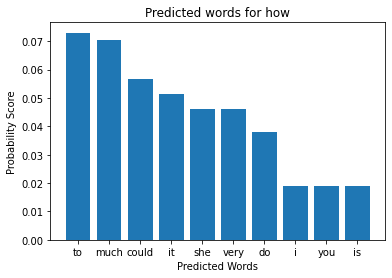

In [ ]:
import matplotlib.pyplot as plt
x_pos = np.arange(len(word))
plt.bar(x_pos,probability_score,align='center')
plt.xticks(x_pos,word)
plt.ylabel('Probability Score')
plt.xlabel('Predicted Words')
plt.title('Predicted words for ' + 'how')
plt.show()

In [ ]:
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Quite the same process for trigramns and 4-grams**

### **Using trigrams**

In [ ]:
#creating bigram of the corpus
trigrm = list(nltk.trigrams(word_tokenize(new_emma)))
trigrm

[('emma', 'by', 'jane'),
 ('by', 'jane', 'austen'),
 ('jane', 'austen', '1816'),
 ('austen', '1816', 'volume'),
 ('1816', 'volume', 'i'),
 ('volume', 'i', 'chapter'),
 ('i', 'chapter', 'i'),
 ('chapter', 'i', 'emma'),
 ('i', 'emma', 'woodhouse'),
 ('emma', 'woodhouse', 'handsome'),
 ('woodhouse', 'handsome', 'clever'),
 ('handsome', 'clever', 'and'),
 ('clever', 'and', 'rich'),
 ('and', 'rich', 'with'),
 ('rich', 'with', 'a'),
 ('with', 'a', 'comfortable'),
 ('a', 'comfortable', 'home'),
 ('comfortable', 'home', 'and'),
 ('home', 'and', 'happy'),
 ('and', 'happy', 'disposition'),
 ('happy', 'disposition', 'seemed'),
 ('disposition', 'seemed', 'to'),
 ('seemed', 'to', 'unite'),
 ('to', 'unite', 'some'),
 ('unite', 'some', 'of'),
 ('some', 'of', 'the'),
 ('of', 'the', 'best'),
 ('the', 'best', 'blessings'),
 ('best', 'blessings', 'of'),
 ('blessings', 'of', 'existence'),
 ('of', 'existence', 'and'),
 ('existence', 'and', 'had'),
 ('and', 'had', 'lived'),
 ('had', 'lived', 'nearly'),
 ('l

In [ ]:
# converting to a probabilistic language model
probability_score=[]
word=[]

def build_trigram_model():
    trigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for w1, w2, w3 in trigrm:
        trigram_model[(w1,w2)][w3] += 1
    for w1_w2 in trigram_model:
            #total count of bigrams starting with w1_w2
            trigram_count_4_w1_w2 = float(sum(trigram_model[w1_w2].values()))
            #distribute the probability mass for all trigrams starting with w1_w2
            for w3 in trigram_model[w1_w2]:
                trigram_model[w1_w2][w3] /= trigram_count_4_w1_w2
    return trigram_model

def predict_next_word(w1, w2):
    #buikd the model
    model = build_trigram_model()
    #get the next for the trigram starting with 'word'
    second_word = model[(w1,w2)]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(15)

    for i in top10words:
      probability_score.append(i[1])
      word.append(i[0])

In [ ]:
predict_next_word('how','far')

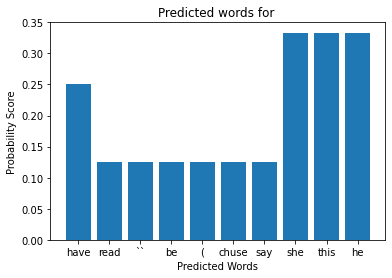

In [ ]:
import matplotlib.pyplot as plt
x_pos = np.arange(len(word))
plt.bar(x_pos,probability_score,align='center')
plt.xticks(x_pos,word)
plt.ylabel('Probability Score')
plt.xlabel('Predicted Words')
plt.title('Predicted words for ')
plt.show()

In [ ]:
word

['you', 'they']

### **Using LSTM**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
source="https://machinelearningmastery.com/develop-word-based-neural-language-models-python-keras/"

##### **One-input, one-output model(needs maintenance**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([new_emma])
encoded = tokenizer.texts_to_sequences([new_emma])[0]

In [ ]:
encoded

[29,
 45,
 91,
 4352,
 4353,
 2754,
 5,
 348,
 5,
 29,
 86,
 489,
 625,
 3,
 1010,
 23,
 6,
 528,
 164,
 3,
 172,
 687,
 157,
 1,
 2755,
 97,
 4,
 2,
 238,
 1824,
 4,
 1528,
 3,
 17,
 665,
 1011,
 583,
 61,
 366,
 11,
 2,
 245,
 23,
 24,
 77,
 1,
 818,
 54,
 4354,
 8,
 10,
 9,
 2,
 2329,
 4,
 2,
 132,
 1666,
 4,
 6,
 103,
 1415,
 3314,
 121,
 3,
 17,
 11,
 626,
 4,
 8,
 536,
 520,
 34,
 1206,
 4,
 26,
 214,
 49,
 6,
 24,
 451,
 855,
 8,
 273,
 17,
 2330,
 100,
 151,
 547,
 20,
 8,
 1,
 21,
 59,
 66,
 60,
 4355,
 1529,
 4,
 8,
 4356,
 3,
 8,
 220,
 17,
 34,
 2021,
 45,
 60,
 529,
 165,
 19,
 1416,
 92,
 17,
 1667,
 77,
 279,
 4,
 6,
 273,
 11,
 386,
 1417,
 366,
 17,
 41,
 391,
 34,
 11,
 25,
 86,
 258,
 287,
 19,
 6,
 1416,
 66,
 6,
 133,
 24,
 472,
 4,
 236,
 1666,
 18,
 414,
 4,
 29,
 267,
 64,
 7,
 9,
 59,
 2,
 762,
 4,
 1131,
 166,
 102,
 41,
 391,
 17,
 1825,
 1,
 1012,
 2,
 4357,
 927,
 4,
 1416,
 2,
 4358,
 4,
 8,
 507,
 17,
 275,
 462,
 8,
 1,
 4359,
 39,
 2756,
 3,
 2,
 3315,


In [ ]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'i': 5,
 'a': 6,
 'it': 7,
 'her': 8,
 'was': 9,
 'she': 10,
 'in': 11,
 'not': 12,
 'you': 13,
 'be': 14,
 'that': 15,
 'he': 16,
 'had': 17,
 'but': 18,
 'as': 19,
 'for': 20,
 'have': 21,
 'is': 22,
 'with': 23,
 'very': 24,
 'mr': 25,
 'his': 26,
 'at': 27,
 'so': 28,
 'emma': 29,
 'all': 30,
 'could': 31,
 'would': 32,
 'him': 33,
 'been': 34,
 'no': 35,
 'my': 36,
 'mrs': 37,
 'on': 38,
 'any': 39,
 'do': 40,
 'miss': 41,
 'were': 42,
 'me': 43,
 'will': 44,
 'by': 45,
 'must': 46,
 'which': 47,
 'there': 48,
 'from': 49,
 'they': 50,
 'what': 51,
 'this': 52,
 'harriet': 53,
 'or': 54,
 'such': 55,
 'much': 56,
 'if': 57,
 'said': 58,
 'more': 59,
 'an': 60,
 'one': 61,
 'are': 62,
 'weston': 63,
 'them': 64,
 'every': 65,
 'than': 66,
 'am': 67,
 'well': 68,
 'thing': 69,
 'knightley': 70,
 'elton': 71,
 'think': 72,
 'how': 73,
 'should': 74,
 'your': 75,
 'when': 76,
 'little': 77,
 'being': 78,
 'never': 79,
 'good': 80,
 'we': 81,


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 7128


In [ ]:
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)


In [ ]:
# split into X and y elements
import numpy as np
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]

In [ ]:
# Getting one-hot encoded vector
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
import tensorflow.keras as tf
model=tf.models.Sequential()
model.add(tf.layers.Embedding(vocab_size, 10, input_length=1))
model.add(tf.layers.LSTM(50))
model.add(tf.layers.Dense(vocab_size, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             71280     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 7128)              363528    
Total params: 447,008
Trainable params: 447,008
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

In [ ]:
# getting predictions from the model, predicting next 5 words
sent=""
in_text = "You"
for i in range(5):
  sent= sent+" " + in_text
  encoded_text = tokenizer.texts_to_sequences([in_text])[0]
  encoded_text = np.array(encoded_text)
  yhat = np.argmax(model.predict(encoded_text))
  for word, index in tokenizer.word_index.items():
    if index == yhat:
      in_text=word
      break

In [ ]:
print(sent)
# doesn't make any sense whatsoever

In [ ]:
#using model.save_weights() to save the weights of the model in HDF5 format
# remove while uploading to github about loading
model.save_weights("/content/gdrive/My Drive/weights.h5")

In [ ]:
model.load_weights("/content/gdrive/My Drive/weights.h5")

In [ ]:
tokenizer.word_index

In [ ]:
yhat

In [ ]:
source="https://stackoverflow.com/questions/41859997/keras-model-load-weights-for-neural-net/41860156"
# loading models

##### **Line-by- line sequence model**

In [ ]:
# Here preprocessing is a bit different because lines have to be separated. We don't remove the '.' to indicate end of line
# importing from nltk in raw form
emma=nltk.corpus.gutenberg.raw("austen-emma.txt")

# removing punctuation from the text and lowering it
def remove_punctuation(text):
   punctuation=[',','\n','\\',']','[',';',':','\'s','_','-','?','\"',"(",')']
   for i in punctuation:
     text=str(text).replace(str(i)," ")
   return text
new_emma= remove_punctuation(emma)
new_emma= new_emma.lower()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts([new_emma])
# create line-based sequences
sequences = []
for line in new_emma.split('.'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
      sequence = encoded
      sequences.append(sequence)


In [ ]:
len(sequences)

152247

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
# padding input
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

In [ ]:
#split into output and input sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
sequences = np.array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
vocab_size = len(tokenizer.word_index) + 1
y = to_categorical(y, num_classes=vocab_size)

In [ ]:
import tensorflow.keras as tf
model=tf.models.Sequential()
model.add(tf.layers.Embedding(vocab_size, 10, input_length=1))
model.add(tf.layers.LSTM(50))
model.add(tf.layers.Dense(vocab_size, activation='softmax'))
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             71280     
_________________________________________________________________
lstm (LSTM)                  (None, 50)                12200     
_________________________________________________________________
dense (Dense)                (None, 7128)              363528    
Total params: 447,008
Trainable params: 447,008
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
4758/4758 - 56s - loss: 5.3760 - accuracy: 0.1197
Epoch 2/500
4758/4758 - 48s - loss: 3.5476 - accuracy: 0.3155
Epoch 3/500
4758/4758 - 48s - loss: 2.3869 - accuracy: 0.5409
Epoch 4/500
4758/4758 - 49s - loss: 1.6766 - accuracy: 0.6819
Epoch 5/500
4758/4758 - 50s - loss: 1.2306 - accuracy: 0.7693
Epoch 6/500
4758/4758 - 49s - loss: 0.9323 - accuracy: 0.8259
Epoch 7/500
4758/4758 - 49s - loss: 0.7246 - accuracy: 0.8651
Epoch 8/500
4758/4758 - 50s - loss: 0.5789 - accuracy: 0.8939
Epoch 9/500
4758/4758 - 49s - loss: 0.4810 - accuracy: 0.9135
Epoch 10/500
4758/4758 - 48s - loss: 0.4000 - accuracy: 0.9285
Epoch 11/500
4758/4758 - 48s - loss: 0.3301 - accuracy: 0.9419
Epoch 12/500
4758/4758 - 48s - loss: 0.2996 - accuracy: 0.9458
Epoch 13/500
4758/4758 - 48s - loss: 0.2494 - accuracy: 0.9560
Epoch 14/500
4758/4758 - 48s - loss: 0.2173 - accuracy: 0.9618
Epoch 15/500
4758/4758 - 49s - loss: 0.1962 - accuracy: 0.9653
Epoch 16/500
4758/4758 - 49s - loss: 0.1773 - accuracy: 0.9691
E

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save_weights("/content/gdrive/My Drive/weights_line.h5")

Mounted at /content/gdrive


In [ ]:
sent=""
in_text = "What"
for i in range(5):
  sent= sent+" " + in_text
  encoded_text = tokenizer.texts_to_sequences([in_text])[0]
  encoded_text = np.array(encoded_text)
  yhat = np.argmax(model.predict(encoded_text))
  for word, index in tokenizer.word_index.items():
    if index == yhat:
      in_text=word
      break
sent

' What stir off very martin'

 **Other one is two words input one word input or inputting subsequences of a statement. That is similar to the first one.**